Importing the necessary libraries and the pickle file of the dataset.



In [ ]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model



In [ ]:
import gdown
import pickle
import pandas as pd

# Google Drive file ID (replace this with your actual file ID)
file_id = "1qf-nsQsrMIrQwKFFicwCRps5DrTE-Ptl"  # Update with your actual file ID

# Define output file name
file_path = "/content/input_data.pkl"

# Download the file using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)

# Load the pickle file
with open(file_path, "rb") as file:
    data = pickle.load(file)

df_X = pd.DataFrame(data["X"])

print(df_X.head())
print("Data shape:", df_X.shape)


Downloading...
From: https://drive.google.com/uc?id=1qf-nsQsrMIrQwKFFicwCRps5DrTE-Ptl
To: /content/input_data.pkl
100%|██████████| 2.86M/2.86M [00:00<00:00, 25.3MB/s]


        0         1         2         3         4         5         6    \
0  0.577706  0.231914 -0.420472  0.999994  0.586725  0.216498 -0.401769   
1  0.577704  0.232117 -0.423063  0.999993  0.586727  0.216654 -0.403755   
2  0.577799  0.232135 -0.422215  0.999994  0.586800  0.216666 -0.402409   
3  0.577943  0.231958 -0.410397  0.999994  0.586904  0.216641 -0.389879   
4  0.578053  0.231574 -0.407048  0.999993  0.586976  0.216544 -0.386019   

        7         8         9    ...       122       123       124       125  \
0  0.999976  0.591864  0.216841  ...  0.295693  0.813606  0.600815  0.954061   
1  0.999974  0.591878  0.217061  ...  0.299121  0.812577  0.599050  0.954614   
2  0.999974  0.591967  0.217080  ...  0.293218  0.811234  0.598365  0.955232   
3  0.999974  0.592074  0.217071  ...  0.286550  0.810070  0.598157  0.955507   
4  0.999974  0.592150  0.217003  ...  0.283523  0.808028  0.597895  0.955590   

        126       127       128       129       130       131  
0  0

So the dataset is given as the shape of (2700, 132) and features are lined up like f1x f1y f1z f1v. But let's visualize the dataset using heatmaps and boxplots to make sure that if  the features are really  given in that way in the dataset. The coloumn of each x ( y , z , v) coordinates should have higher correlation with each other in the heatmap and they should have same they all should have same min and max in boxplot.

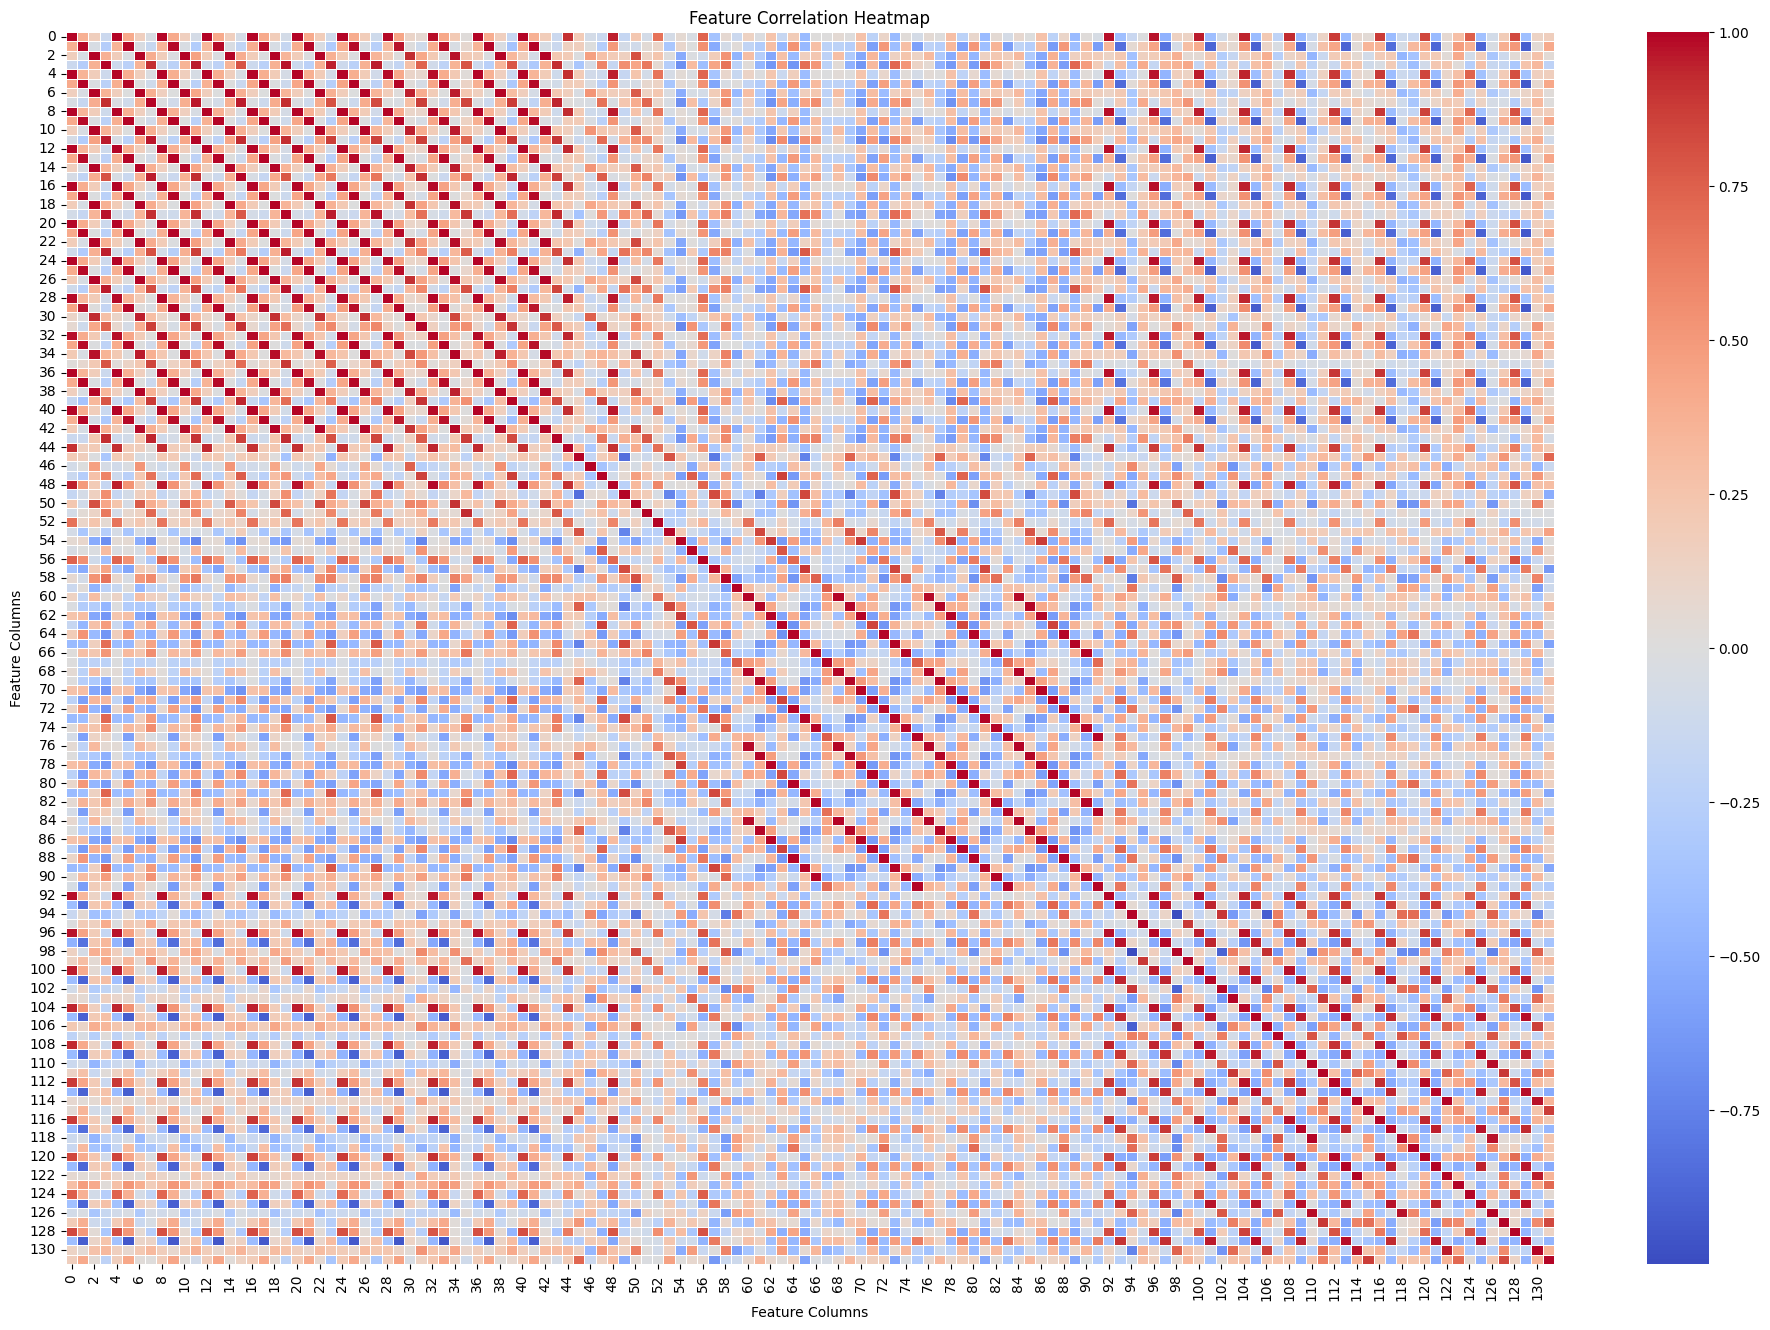

In [ ]:
corr_matrix = df_X.corr()

plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.xlabel("Feature Columns")
plt.ylabel("Feature Columns")

plt.show()


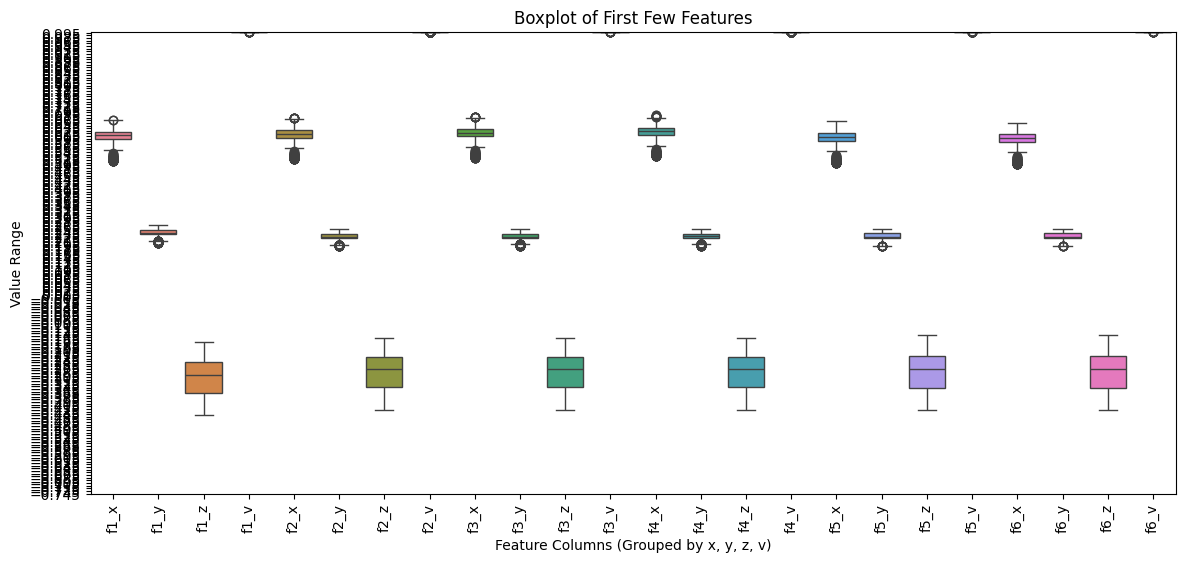

In [ ]:
num_features_to_plot = 6
columns_to_plot = df_X.iloc[:, : num_features_to_plot * 4]  # Selecting corresponding columns


feature_labels = []
for i in range(num_features_to_plot):
    feature_labels.extend([f"f{i+1}_x", f"f{i+1}_y", f"f{i+1}_z", f"f{i+1}_v"])

# Creating the boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=columns_to_plot)
plt.xticks(ticks=range(len(feature_labels)), labels=feature_labels, rotation=90)
plt.xlabel("Feature Columns (Grouped by x, y, z, v)")

# Formatting the y-axis with a step size of 0.01
plt.ylabel("Value Range")
plt.ylim(df_X.min().min(), df_X.max().max())
plt.yticks(np.arange(df_X.min().min(), df_X.max().max(), 0.01))

plt.title("Boxplot of First Few Features")
plt.show()


Since after every 4 coloumn, we have similar shape of boxplot and higher correlation in the heatmap between them, it is true that the shape of the dataset is as I assumed.

The boxplot of V coordinate seems off. The min and max of each coloumn of the V should be the same, means the boxplot for each coloumn of v should have equal boundary, as it was stated in the exam paper, but it seems like thats not the case. Let's use plot a min max table for V to make sure.

In [ ]:


# Extract columns for V (assuming order is consistent every 4th column)
v_columns = df_X.iloc[:, 3::4]

# Create min-max table for V only
min_max_v_table = pd.DataFrame({
    "Feature (V)": [f"f{i+1}_v" for i in range(33)],
    "Min (V)": v_columns.min().values,
    "Max (V)": v_columns.max().values,
})

# Compute global min/max for V
global_v_row = pd.DataFrame({
    "Feature (V)": ["Global Min/Max"],
    "Min (V)": [v_columns.min().min()],
    "Max (V)": [v_columns.max().max()],
})


min_max_v_table = pd.concat([min_max_v_table, global_v_row], ignore_index=True)

import IPython.display as display
display.display(min_max_v_table)


,Feature (V),Min (V),Max (V)
0,f1_v,0.999845,0.999999
1,f2_v,0.999721,0.999994
2,f3_v,0.999656,0.999994
3,f4_v,0.999640,0.999993
4,f5_v,0.999498,0.999994
5,f6_v,0.999336,0.999993
6,f7_v,0.999314,0.999992
7,f8_v,0.999485,0.999996
8,f9_v,0.998309,0.999995
9,f10_v,0.999702,0.999998


**It looks like there have been a mistake on the question paper, where the detail of the dataset is listed.** The min max of V coordinate for every coloumn is written there as ( 0.914, 0.989), which clearly is not the case, in fact all coloumn has a different min and max. In case i interpreted it wrong, like the min max value given on the exam paper is global min max for v coordinate, I also checked it on the table, and it is not the case. **From the looks of it, the detail given on the min max of V coordinate coloumns are just the min  max value of the V coordinate of 33rd feature.**

Let's check for all other coordinates ( x y z), since V was wrong.

In [ ]:


# Extract columns for V, X, Y, Z (assuming order is consistent every 4th column)
v_columns = df_X.iloc[:, 3::4]
x_columns = df_X.iloc[:, ::4]
y_columns = df_X.iloc[:, 1::4]
z_columns = df_X.iloc[:, 2::4]


min_max_table = pd.DataFrame({

    "Feature (X)": [f"f{i+1}_x" for i in range(33)],
    "Min (X)": x_columns.min().values,
    "Max (X)": x_columns.max().values,
    "Feature (Y)": [f"f{i+1}_y" for i in range(33)],
    "Min (Y)": y_columns.min().values,
    "Max (Y)": y_columns.max().values,
    "Feature (Z)": [f"f{i+1}_z" for i in range(33)],
    "Min (Z)": z_columns.min().values,
    "Max (Z)": z_columns.max().values,
})


global_row = pd.DataFrame({

    "Feature (X)": ["Global Min/Max"],
    "Min (X)": [x_columns.min().min()],
    "Max (X)": [x_columns.max().max()],
    "Feature (Y)": ["Global Min/Max"],
    "Min (Y)": [y_columns.min().min()],
    "Max (Y)": [y_columns.max().max()],
    "Feature (Z)": ["Global Min/Max"],
    "Min (Z)": [z_columns.min().min()],
    "Max (Z)": [z_columns.max().max()],
})

min_max_table = pd.concat([min_max_table, global_row], ignore_index=True)

import IPython.display as display
display.display(min_max_table)


,Feature (X),Min (X),Max (X),Feature (Y),Min (Y),Max (Y),Feature (Z),Min (Z),Max (Z)
0,f1_x,0.510423,0.666580,f1_y,0.200606,0.268113,f1_z,-0.446130,-0.170792
1,f2_x,0.518286,0.674991,f2_y,0.188763,0.254317,f2_z,-0.427610,-0.157937
2,f3_x,0.523596,0.678843,f3_y,0.189430,0.254207,f3_z,-0.427597,-0.158009
3,f4_x,0.528850,0.683749,f4_y,0.190313,0.254332,f4_z,-0.427580,-0.158072
4,f5_x,0.503355,0.660808,f5_y,0.188808,0.255333,f5_z,-0.427918,-0.145660
5,f6_x,0.498415,0.655263,f6_y,0.189321,0.255953,f6_z,-0.427975,-0.145621
6,f7_x,0.495435,0.651216,f7_y,0.190169,0.256776,f7_z,-0.427984,-0.145587
7,f8_x,0.534882,0.690078,f8_y,0.202973,0.261289,f8_z,-0.289614,-0.046437
8,f9_x,0.491653,0.645042,f9_y,0.203774,0.263887,f9_z,-0.292287,-0.002720
9,f10_x,0.520372,0.673837,f10_y,0.220984,0.283691,f10_z,-0.392909,-0.132599


Yes, just like V coordinate, all other coordinates also have different min max values in each coloumn. The values given on the exam detail is only the min max for the coloumn of coordinates for the 33rd feature, the last one.
Since the min max of all coloumns of each coordinates ( x, y z, v) are different, using min max scalar to pre-process the data will have no practical use. **I have proposed min max scaling for pre processing as it would be a  natural way to normalize each column while preserving feature relationships, but since  every coloumns of each coordinate does not share the same min max value as given in the question paper, the model will not profit from min max scaling.** Instead, in this case, model will benefit more if the values are standardized using a standard scalar, so I will apply standard scalar instead, and naturally the domain will also change then. The input value domain will be (-∞, ∞), and not [0,1] as i wrote on the paper. And the initializer and activation functions will benefit from values scaled to the unit variance with mean 0 (standard scaling).

**CHANGE : I will be applying standard scalar for pre processing instead of minmax scalar because of above stated reason.**

And as stated in my answer paper, page 2, i will convert the label with one-hot-encoding.

In [ ]:



#Load data
df_X = pd.DataFrame(data["X"])
df_y = pd.DataFrame(data["y"])

#Checking for missing values
missing_X = df_X.isnull().sum().sum()
missing_y = df_y.isnull().sum().sum()

print(f"Missing values in X: {missing_X}")
print(f"Missing values in y: {missing_y}")

X = df_X.to_numpy()
y = df_y.to_numpy().ravel()  # Flatten y to 1D array if needed

#One-Hot Encode labels
if y.dtype == object or len(np.unique(y)) > 2:
    encoder = OneHotEncoder(sparse_output=False)
    y = encoder.fit_transform(y.reshape(-1, 1))

#Train-Validation-Test Split (Before Scaling!)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

#Apply StandardScaler Only
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit & transform on training data only
X_val = scaler.transform(X_val)  # Transform val using same scaler
X_test = scaler.transform(X_test)  # Transform test using same scaler

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)






Missing values in X: 0
Missing values in y: 0
(1620, 132) (540, 132) (540, 132) (1620, 7) (540, 7) (540, 7)


In [ ]:
print("Sample y_train labels:", y_train[:10])
print("Sample y_val labels:", y_val[:10])
print("Sample y_test labels:", y_test[:10])


Sample y_train labels: [[0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]
Sample y_val labels: [[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]]
Sample y_test labels: [[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0.]]


The shape of the splits, look as expected, now i can move on to the next step of building the model. I will create a build model function with the hyperparameters i will apply optimization on. As stated on page 4 of my answer sheet, the parameters ill optimize on are:
1) number of layers and their neurones
2) Learning rate for optimizer
3) dropout rate
4) epochs ( Not needed for this function. Will be optimizing this paramater during training, by using early stop. )
5) L2 regularization ONLY IF model overfits to training set.( will add it with pentaly = 0 as default, so it is only used when a penalty is given)

The model initial composition before optimization will follow as written in my exam sheet page 5: 5 dense layer with batch normalization and relu activation, with he initialization. The layers will have decreasing neurones [512, 256, 128, 64, 32]. And output layer with 7 neurones with softmax activation.



In [ ]:
def build_model(num_layers=None, learning_rate=None, dropout_rate=None, neuron_list=None, l2_penalty=None):
    """
    Creates an MLP model with decreasing neurons and optional L2 regularization.

    Parameters:
    - num_layers (int or None): Number of hidden layers (if None, default is 5)
    - learning_rate (float or None): Learning rate for the optimizer (default: 0.001)
    - dropout_rate (float or None): Dropout rate for each Dropout layer (default: 0.2)
    - neuron_list (list or None): Custom list of neurons for each layer (default: decreasing order)
    - l2_penalty (float or None): L2 regularization penalty (default: 0, meaning no L2 regularization)

    Returns:
    - model (tf.keras.Model): Compiled MLP model.
    """


    if num_layers is None:
        num_layers = 5  # Default to full 5 layers

    if learning_rate is None:
        learning_rate = 0.001  # Default learning rate

    if dropout_rate is None:
        dropout_rate = 0.2  # Default dropout rate

    if l2_penalty is None:
        l2_penalty = 0  # Default L2 regularization is 0 (disabled)

    # Default neuron list
    if neuron_list is None:
        full_neurons = [512, 256, 128, 64, 32]
        neuron_list = full_neurons[-num_layers:]


    model = Sequential()

    # Input Layer (First Hidden Layer)
    model.add(Dense(neuron_list[0], kernel_initializer="he_normal", input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(Dropout(dropout_rate))  # Apply dropout

    # Adding Hidden Layers
    for i in range(1, num_layers):
        model.add(Dense(neuron_list[i], kernel_initializer="he_normal"))
        model.add(BatchNormalization())
        model.add(tf.keras.layers.ReLU())
        model.add(Dropout(dropout_rate))  # Apply dropout after every Dense layer


    if l2_penalty > 0:
        model.add(Dense(neuron_list[-1], kernel_regularizer=l2(l2_penalty), activation="linear"))


    model.add(Dense(y_train.shape[1], activation="softmax"))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=[tf.keras.metrics.CategoricalAccuracy()])  # 🔹 Use Keras built-in accuracy

    return model




In [ ]:
initial_model = build_model()
initial_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 32)                  │              

 Total params: 246,855 (964.28 KB)

 Trainable params: 244,871 (956.53 KB)

 Non-trainable params: 1,984 (7.75 KB)

Let's train this initial model on the dataset and check how it goes.

In [ ]:
early_stop = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint("initial_model.h5", monitor="val_loss", save_best_only=True, verbose=1)

# Train the model
history = initial_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - categorical_accuracy: 0.5089 - loss: 1.4561
Epoch 1: val_loss improved from inf to 0.09351, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 22s 34ms/step - categorical_accuracy: 0.5133 - loss: 1.4474 - val_categorical_accuracy: 1.0000 - val_loss: 0.0935
Epoch 2/50
49/51 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.9754 - loss: 0.4353
Epoch 2: val_loss improved from 0.09351 to 0.01915, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.9756 - loss: 0.4320 - val_categorical_accuracy: 1.0000 - val_loss: 0.0191
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - categorical_accuracy: 0.9931 - loss: 0.2441
Epoch 3: val_loss improved from 0.01915 to 0.01147, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - categorical_accuracy: 0.9930 - loss: 0.2437 - val_categorical_accuracy: 1.0000 - val_loss: 0.0115
Epoch 4/50
50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.9914 - loss: 0.1583
Epoch 4: val_loss improved from 0.01147 to 0.00851, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - categorical_accuracy: 0.9916 - loss: 0.1573 - val_categorical_accuracy: 1.0000 - val_loss: 0.0085
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.9987 - loss: 0.1025
Epoch 5: val_loss improved from 0.00851 to 0.00588, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - categorical_accuracy: 0.9987 - loss: 0.1026 - val_categorical_accuracy: 1.0000 - val_loss: 0.0059
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.9956 - loss: 0.0902
Epoch 6: val_loss improved from 0.00588 to 0.00459, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.9956 - loss: 0.0902 - val_categorical_accuracy: 1.0000 - val_loss: 0.0046
Epoch 7/50
50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.9981 - loss: 0.0648
Epoch 7: val_loss improved from 0.00459 to 0.00362, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - categorical_accuracy: 0.9982 - loss: 0.0647 - val_categorical_accuracy: 1.0000 - val_loss: 0.0036
Epoch 8/50
50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.9997 - loss: 0.0506
Epoch 8: val_loss improved from 0.00362 to 0.00280, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - categorical_accuracy: 0.9997 - loss: 0.0505 - val_categorical_accuracy: 1.0000 - val_loss: 0.0028
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.9985 - loss: 0.0439
Epoch 9: val_loss improved from 0.00280 to 0.00214, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - categorical_accuracy: 0.9985 - loss: 0.0440 - val_categorical_accuracy: 1.0000 - val_loss: 0.0021
Epoch 10/50
48/51 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - categorical_accuracy: 0.9965 - loss: 0.0356
Epoch 10: val_loss improved from 0.00214 to 0.00163, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - categorical_accuracy: 0.9964 - loss: 0.0360 - val_categorical_accuracy: 1.0000 - val_loss: 0.0016
Epoch 11/50
49/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.9980 - loss: 0.0346
Epoch 11: val_loss improved from 0.00163 to 0.00120, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.9980 - loss: 0.0345 - val_categorical_accuracy: 1.0000 - val_loss: 0.0012
Epoch 12/50
50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.9983 - loss: 0.0311
Epoch 12: val_loss improved from 0.00120 to 0.00100, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.9983 - loss: 0.0311 - val_categorical_accuracy: 1.0000 - val_loss: 9.9684e-04
Epoch 13/50
48/51 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9996 - loss: 0.0265
Epoch 13: val_loss improved from 0.00100 to 0.00081, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.9995 - loss: 0.0262 - val_categorical_accuracy: 1.0000 - val_loss: 8.1085e-04
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 1.0000 - loss: 0.0190
Epoch 14: val_loss improved from 0.00081 to 0.00067, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0190 - val_categorical_accuracy: 1.0000 - val_loss: 6.7107e-04
Epoch 15/50
48/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.9998 - loss: 0.0175
Epoch 15: val_loss improved from 0.00067 to 0.00056, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.9998 - loss: 0.0174 - val_categorical_accuracy: 1.0000 - val_loss: 5.6274e-04
Epoch 16/50
50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.9991 - loss: 0.0163
Epoch 16: val_loss improved from 0.00056 to 0.00046, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.9991 - loss: 0.0163 - val_categorical_accuracy: 1.0000 - val_loss: 4.5634e-04
Epoch 17/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.9968 - loss: 0.0172
Epoch 17: val_loss improved from 0.00046 to 0.00040, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.9969 - loss: 0.0172 - val_categorical_accuracy: 1.0000 - val_loss: 3.9525e-04
Epoch 18/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 0.9976 - loss: 0.0228
Epoch 18: val_loss improved from 0.00040 to 0.00038, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - categorical_accuracy: 0.9976 - loss: 0.0228 - val_categorical_accuracy: 1.0000 - val_loss: 3.8130e-04
Epoch 19/50
46/51 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - categorical_accuracy: 0.9967 - loss: 0.0187
Epoch 19: val_loss improved from 0.00038 to 0.00024, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.9969 - loss: 0.0182 - val_categorical_accuracy: 1.0000 - val_loss: 2.4022e-04
Epoch 20/50
46/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 1.0000 - loss: 0.0091
Epoch 20: val_loss improved from 0.00024 to 0.00022, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 1.0000 - loss: 0.0093 - val_categorical_accuracy: 1.0000 - val_loss: 2.2341e-04
Epoch 21/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.9997 - loss: 0.0132
Epoch 21: val_loss improved from 0.00022 to 0.00020, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9996 - loss: 0.0133 - val_categorical_accuracy: 1.0000 - val_loss: 2.0015e-04
Epoch 22/50
45/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 1.0000 - loss: 0.0087
Epoch 22: val_loss improved from 0.00020 to 0.00017, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 1.0000 - loss: 0.0088 - val_categorical_accuracy: 1.0000 - val_loss: 1.6585e-04
Epoch 23/50
49/51 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - categorical_accuracy: 0.9999 - loss: 0.0112
Epoch 23: val_loss improved from 0.00017 to 0.00014, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - categorical_accuracy: 0.9998 - loss: 0.0113 - val_categorical_accuracy: 1.0000 - val_loss: 1.4008e-04
Epoch 24/50
46/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.9990 - loss: 0.0108
Epoch 24: val_loss improved from 0.00014 to 0.00011, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.9989 - loss: 0.0114 - val_categorical_accuracy: 1.0000 - val_loss: 1.0660e-04
Epoch 25/50
46/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.9989 - loss: 0.0124
Epoch 25: val_loss did not improve from 0.00011
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - categorical_accuracy: 0.9988 - loss: 0.0123 - val_categorical_accuracy: 1.0000 - val_loss: 1.1361e-04
Epoch 26/50
45/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 1.0000 - loss: 0.0063
Epoch 26: val_loss improved from 0.00011 to 0.00009, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 1.0000 - loss: 0.0063 - val_categorical_accuracy: 1.0000 - val_loss: 9.3104e-05
Epoch 27/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 1.0000 - loss: 0.0106
Epoch 27: val_loss improved from 0.00009 to 0.00007, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 1.0000 - loss: 0.0106 - val_categorical_accuracy: 1.0000 - val_loss: 7.3644e-05
Epoch 28/50
49/51 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.9983 - loss: 0.0081
Epoch 28: val_loss improved from 0.00007 to 0.00006, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - categorical_accuracy: 0.9984 - loss: 0.0080 - val_categorical_accuracy: 1.0000 - val_loss: 6.2360e-05
Epoch 29/50
50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 1.0000 - loss: 0.0086
Epoch 29: val_loss improved from 0.00006 to 0.00006, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 1.0000 - loss: 0.0086 - val_categorical_accuracy: 1.0000 - val_loss: 5.5260e-05
Epoch 30/50
49/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.9996 - loss: 0.0068
Epoch 30: val_loss improved from 0.00006 to 0.00005, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9996 - loss: 0.0068 - val_categorical_accuracy: 1.0000 - val_loss: 5.4382e-05
Epoch 31/50
45/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.9990 - loss: 0.0100
Epoch 31: val_loss improved from 0.00005 to 0.00004, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.9991 - loss: 0.0098 - val_categorical_accuracy: 1.0000 - val_loss: 4.3818e-05
Epoch 32/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 1.0000 - loss: 0.0062
Epoch 32: val_loss improved from 0.00004 to 0.00004, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - categorical_accuracy: 1.0000 - loss: 0.0063 - val_categorical_accuracy: 1.0000 - val_loss: 4.3512e-05
Epoch 33/50
48/51 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - categorical_accuracy: 1.0000 - loss: 0.0052
Epoch 33: val_loss did not improve from 0.00004
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - categorical_accuracy: 0.9999 - loss: 0.0057 - val_categorical_accuracy: 1.0000 - val_loss: 7.1086e-05
Epoch 34/50
47/51 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - categorical_accuracy: 0.9985 - loss: 0.0073
Epoch 34: val_loss improved from 0.00004 to 0.00004, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - categorical_accuracy: 0.9985 - loss: 0.0074 - val_categorical_accuracy: 1.0000 - val_loss: 3.5627e-05
Epoch 35/50
48/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.9990 - loss: 0.0072
Epoch 35: val_loss improved from 0.00004 to 0.00003, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.9990 - loss: 0.0072 - val_categorical_accuracy: 1.0000 - val_loss: 3.1509e-05
Epoch 36/50
49/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.9991 - loss: 0.0056
Epoch 36: val_loss improved from 0.00003 to 0.00002, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.9991 - loss: 0.0056 - val_categorical_accuracy: 1.0000 - val_loss: 2.1695e-05
Epoch 37/50
50/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 0.9999 - loss: 0.0042
Epoch 37: val_loss improved from 0.00002 to 0.00002, saving model to initial_model.h5


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.9999 - loss: 0.0042 - val_categorical_accuracy: 1.0000 - val_loss: 2.0260e-05
Epoch 38/50
46/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - categorical_accuracy: 1.0000 - loss: 0.0038
Epoch 38: val_loss did not improve from 0.00002
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 1.0000 - loss: 0.0038 - val_categorical_accuracy: 1.0000 - val_loss: 2.1863e-05
Epoch 39/50
48/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.9998 - loss: 0.0039
Epoch 39: val_loss did not improve from 0.00002
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.9998 - loss: 0.0039 - val_categorical_accuracy: 1.0000 - val_loss: 2.2392e-05
Epoch 40/50
48/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.9963 - loss: 0.0224
Epoch 40: val_loss did not improve from 0.00002
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.9959 - loss: 0.0238 - val_categorical_accuracy: 1.0000 - val_loss: 

Let's evaluate the model on test data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Load the best saved model
from tensorflow.keras.models import load_model
initial_model = load_model("initial_model.h5", custom_objects={"f1_score": f1_score})

# Make predictions on the test set
y_pred_probs = initial_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")  # Weighted for multi-class
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-score: {f1:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1-score: 1.0000


This looks too good to be true. To be able to predict with 100 seems very suspicious. I do not think there has been any dataleakage as i checked the code. Another possible reason can be the model is overfitting as i have used 5 dense layer as default, and the dataset is too small, that overfitting is actually giving high accuracy. Let's apply model selection to find the best number of layers and neurones and all other hyperparameter, that might help.

In [ ]:
!pip install optuna-integration[keras]
import optuna
from optuna.integration import KerasPruningCallback


def objective(trial):
    # Defining search space for hyperparameters according to what i proposed
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-2, log=True)
    num_layers = trial.suggest_categorical("num_layers", [1, 2, 3, 4, 5])
    dropout_rate = trial.suggest_categorical("dropout_rate", [0.1, 0.2, 0.3, 0.4, 0.5])
    l2_penalty = trial.suggest_categorical("l2_penalty", [0, 1e-5, 1e-4, 1e-3, 1e-2])
    neuron_choices = [512, 256, 128, 64, 32]
    neuron_list = [trial.suggest_categorical(f"neurons_layer_{i+1}", neuron_choices) for i in range(num_layers)]

    # Build and compile model
    model = build_model(num_layers=num_layers,
                        learning_rate=learning_rate,
                        dropout_rate=dropout_rate,
                        neuron_list=neuron_list,
                        l2_penalty=l2_penalty)


    pruning_callback = KerasPruningCallback(trial, monitor="val_categorical_accuracy")


    early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_categorical_accuracy", patience=3, restore_best_weights=True, verbose=0)

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        callbacks=[early_stop, pruning_callback],
        verbose=0
    )

    # Get the best validation accuracy
    return max(history.history["val_categorical_accuracy"])


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


print("Best hyperparameters found:")
print(study.best_params)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.7 MB/s eta 0:00:00


[I 2025-02-10 13:50:30,837] A new study created in memory with name: no-name-4ab83145-6c12-450d-8a19-3ef4ac45eada
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
[I 2025-02-10 13:50:39,402] Trial 0 finished with value: 1.0 and parameters: {'learning_rate': 0.0004982678037962644, 'num_layers': 3, 'dropout_rate': 0.5, 'l2_penalty': 0.001, 'neurons_layer_1': 32, 'neurons_layer_2': 32, 'neurons_layer_3': 256}. Best is trial 0 with value: 1.0.
[I 2025-02-10 13:50:47,435] Trial 1 finished with value: 1.0 and parameters: {'learning_rate': 3.926635638111702e-05, 'num_layers': 2, 'dropout_rate': 0.1, 'l2_penalty': 0.0001, 'neurons_layer_1': 512, 'neurons_layer_2': 64}. Best is trial 0 with value: 1.0.
[I 2025-02-10 1

Best hyperparameters found:
{'learning_rate': 0.0004982678037962644, 'num_layers': 3, 'dropout_rate': 0.5, 'l2_penalty': 0.001, 'neurons_layer_1': 32, 'neurons_layer_2': 32, 'neurons_layer_3': 256}


As expected, the 5 dense layers were probably overfitting to the dataset and optuna found out that 2 layers will be optimal. lets save the best model given my optuna.

Let's evaluate this model on the test set.

In [ ]:
# list of best hyperparameter from optuna
best_num_layers = 2
best_learning_rate = 3.0040660036407386e-05
best_dropout_rate = 0.1
best_l2_penalty = 0.0001
best_neuron_list = [256, 128]  # Optuna's best neurons for each layer

# Build the best model using Optuna's best hyperparameters
best_model = build_model(
    num_layers=best_num_layers,
    learning_rate=best_learning_rate,
    dropout_rate=best_dropout_rate,
    neuron_list=best_neuron_list,
    l2_penalty=best_l2_penalty
)

# Train the best model with early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1)

history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Save the newly trained best model
best_model.save("best_trained_model.h5")
print("✅ Best model retrained and saved as 'best_trained_model.h5'")


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - categorical_accuracy: 0.1688 - loss: 2.1483 - val_categorical_accuracy: 0.4500 - val_loss: 1.5063
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - categorical_accuracy: 0.5389 - loss: 1.3660 - val_categorical_accuracy: 0.8463 - val_loss: 0.8469
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - categorical_accuracy: 0.8125 - loss: 0.8578 - val_categorical_accuracy: 0.9685 - val_loss: 0.5154
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.9378 - loss: 0.6030 - val_categorical_accuracy: 0.9907 - val_loss: 0.3324
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - categorical_accuracy: 0.9827 - loss: 0.4149 - val_categorical_accuracy: 0.9963 - val_loss: 0.2277
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9872 - loss: 0.3150 - val_categorical_accuracy: 0.9963 - val_loss: 0.1630
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - categorical_accuracy: 0.9905 - loss: 0.24

✅ Best model retrained and saved as 'best_trained_model.h5'


In [ ]:

# Load the trained model
best_model = load_model("best_trained_model.h5")

# Make predictions on the test set
y_pred_probs = best_model.predict(X_test)  # Get probability scores
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels
y_true = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to class labels

# Compute evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="weighted")
recall = recall_score(y_true, y_pred, average="weighted")
f1 = f1_score(y_true, y_pred, average="weighted")

# Print results
print(f" Test Accuracy: {accuracy:.4f}")
print(f" Test Precision: {precision:.4f}")
print(f" Test Recall: {recall:.4f}")
print(f" Test F1-score: {f1:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
 Test Accuracy: 1.0000
 Test Precision: 1.0000
 Test Recall: 1.0000
 Test F1-score: 1.0000


It seems like the accuracy and metrics are still very high even after optimization. It is not only high but maxed, 100% for all. This could be because the dataset is too simple and every class has feature with high variance so that it is easier for model to distinguish between them. But i must make sure that this is the case and the code is not wrong. For that, i will use the same model procedure with the optimized hyperparameter from optuna on a **noisy training set**, and the accuracy should go low, as the trend in values will be random.

In [ ]:
# Re-import dataset
df_X = pd.DataFrame(data["X"])
df_y = pd.DataFrame(data["y"])

# Convert to NumPy arrays
X = df_X.to_numpy()
y = df_y.to_numpy().ravel()  # Flatten y if needed

# One-Hot Encode labels

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Add Noise to `X_train` Before Scaling**
noise_std = 0.3  # Adjust noise level (higher = more noise)
X_train_noisy = X_train + np.random.normal(0, noise_std, X_train.shape)

# Apply StandardScaler**
scaler = StandardScaler()
X_train_noisy_scaled = scaler.fit_transform(X_train_noisy)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


print(X_train_noisy.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)
print("✅ Noisy training data applied and scaled.")


(1620, 132) (540, 132) (540, 132) (1620, 7) (540, 7) (540, 7)
✅ Noisy training data applied and scaled.


In [ ]:
# list of best hyperparameter from optuna
best_num_layers = 2
best_learning_rate = 3.0040660036407386e-05
best_dropout_rate = 0.1
best_l2_penalty = 0.0001
best_neuron_list = [256, 128]  # Optuna's best neurons for each layer

# Build the model using the best Optuna hyperparameters
best_model_noisy = build_model(
    num_layers=best_num_layers,
    learning_rate=best_learning_rate,
    dropout_rate=best_dropout_rate,
    neuron_list=best_neuron_list,
    l2_penalty=best_l2_penalty
)

# Train the model on the noisy X_train
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_categorical_accuracy", patience=5, restore_best_weights=True, verbose=1)

history_noisy = best_model_noisy.fit(
    X_train_noisy_scaled, y_train,  # Noisy X_train
    validation_data=(X_val_scaled, y_val),  # Keep validation data unchanged
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Save the model trained with noisy data
best_model_noisy.save("best_trained_model_noisy.h5")
print("Model trained on noisy X_train saved as 'best_trained_model_noisy.h5'")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - categorical_accuracy: 0.1612 - loss: 2.3079 - val_categorical_accuracy: 0.2852 - val_loss: 1.8621
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.1503 - loss: 2.2218 - val_categorical_accuracy: 0.2537 - val_loss: 1.8135
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - categorical_accuracy: 0.1616 - loss: 2.1461 - val_categorical_accuracy: 0.2463 - val_loss: 1.7687
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - categorical_accuracy: 0.2064 - loss: 2.0779 - val_categorical_accuracy: 0.2463 - val_loss: 1.7331
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - categorical_accuracy: 0.2288 - loss: 2.0257 - val_categorical_accuracy: 0.2519 - val_loss: 1.6963
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - categorical_accuracy: 0.2280 - loss: 1.9699 - val_categorical_accuracy: 0.2704 - val_loss: 1.6623
Epoch 6: early stopping
Restoring model weights from the end of the best epoch: 1.


Model trained on noisy X_train saved as 'best_trained_model_noisy.h5'


In [ ]:


# Load the trained model
best_model_noisy = load_model("best_trained_model_noisy.h5")

# Make predictions on X_test (unchanged test data)
y_pred_probs_noisy = best_model_noisy.predict(X_test_scaled)
y_pred_noisy = np.argmax(y_pred_probs_noisy, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute evaluation metrics
accuracy_noisy = accuracy_score(y_true, y_pred_noisy)
precision_noisy = precision_score(y_true, y_pred_noisy, average="weighted")
recall_noisy = recall_score(y_true, y_pred_noisy, average="weighted")
f1_noisy = f1_score(y_true, y_pred_noisy, average="weighted")

# Print evaluation results
print(f"Test Accuracy (Noisy Training): {accuracy_noisy:.4f}")
print(f"Test Precision (Noisy Training): {precision_noisy:.4f}")
print(f" Test Recall (Noisy Training): {recall_noisy:.4f}")
print(f" Test F1-score (Noisy Training): {f1_noisy:.4f}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Test Accuracy (Noisy Training): 0.2852
Test Precision (Noisy Training): 0.2573
 Test Recall (Noisy Training): 0.2852
 Test F1-score (Noisy Training): 0.2650


Ok that confirms it, that the model is not wrongly implemented, as it does not reach 100% accuracy when the training data is noisy. From this , i can assume that the initial dataset given was too simple, so the model worked really well.

Let's use shap interpreter on the model, to get a local interpretation on which feature led to the prediction. I will draw shap beeswarm summary plot.

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_51
Received: inputs=['Tensor(shape=(100, 132))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer_51
Received: inputs=['Tensor(shape=(200, 132))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/func

shap summary for values averaged over all classes


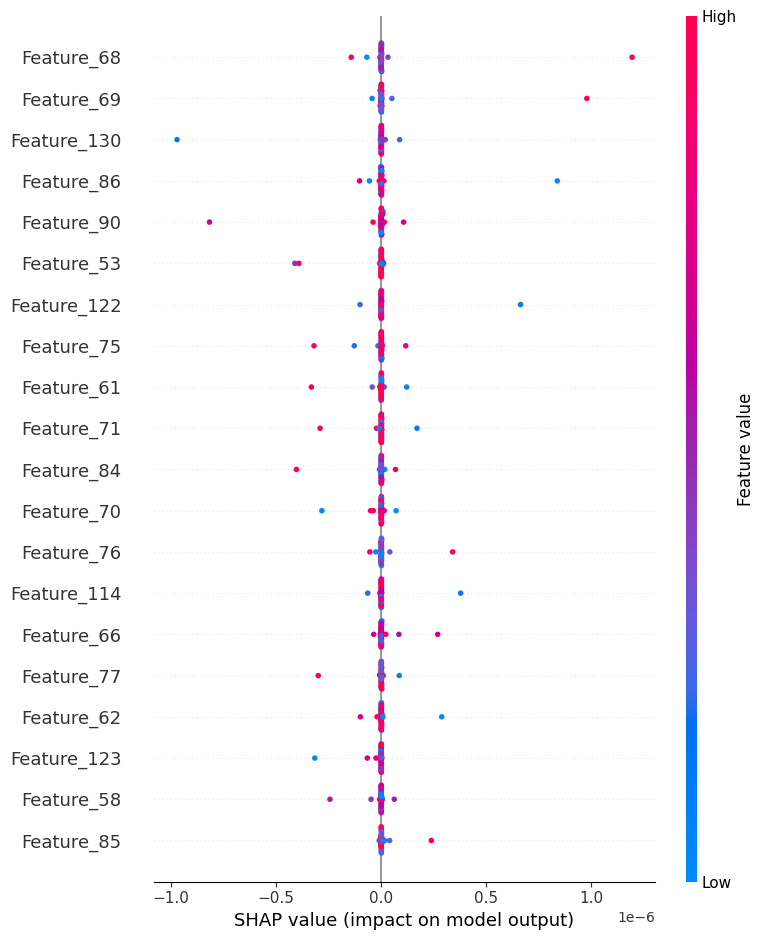

shap summary for class: 6


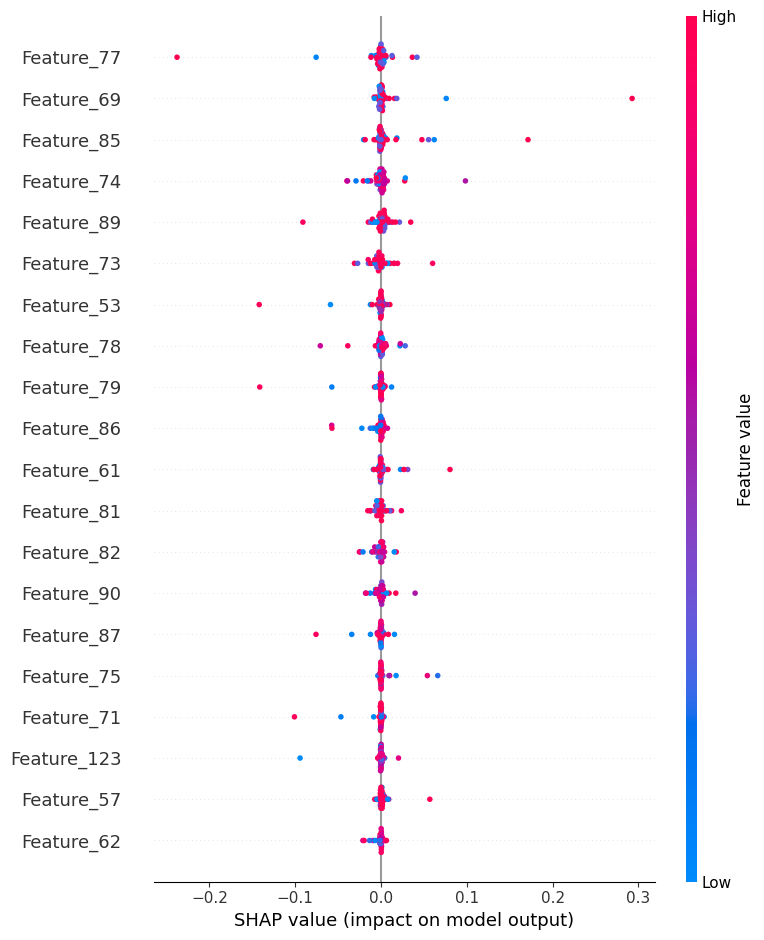

In [ ]:
import shap

model = load_model("best_trained_model.h5")

num_features = X_train.shape[1]
feature_names = [f"Feature_{i}" for i in range(num_features)]  # Generate feature names

X_sample = X_test[:50]

# Use a representative reference dataset for DeepExplainer
X_ref = X_train[:100]

explainer = shap.DeepExplainer(model, X_ref)
shap_values = explainer.shap_values(X_sample)

shap_values_array = np.array(shap_values)

# 🔹 Aggregate SHAP values across classes (retain directionality)
shap_values_mean = np.mean(shap_values_array, axis=-1)


X_sample_df = pd.DataFrame(X_sample, columns=feature_names)

# Plot SHAP summary with values averaged over all classes

print(f'shap summary for values averaged over all classes')
shap.summary_plot(shap_values_mean, X_sample_df, feature_names=feature_names)


class_index = 6
shap_class_values = shap_values_array[:, :, class_index]  # Extract SHAP values for one class (10, 132)
print(f'shap summary for class: {class_index}')

# Plot SHAP summary for a specific class
shap.summary_plot(shap_class_values, X_sample_df, feature_names=feature_names)

It seems like, if we use the average contribution to precition for all classes, most features barely contributed , as most feature shap values are near 0. But the shap summary for one class ( only graph of class 7, with indec 6 is shown), shows that many features contributed negatively and possitively to the prediction for that class. So the average graph showing most features have close to 0 shap value makes sense, as they affected prediction negatively and positively for each classes and when averaged, negative and positive led to 0, or near 0. But to visualize better, lets create a table with shape ( features, classes), where it will show the shap values of each feature while predicting a certain class/label. If the value is highly positive, it means that feature contributed to predicting the given class more and if the value is negative, it will mean that feature inhibited the prediction of that given class.

In [ ]:
import numpy as np
import pandas as pd

shap_values_array = np.array(shap_values)

shap_feature_importance_all_classes = np.mean(shap_values_array, axis=0)  # Shape: (132, 7)
num_features = shap_feature_importance_all_classes.shape[0]
feature_names = [f"Feature_{i}" for i in range(num_features)]  # Generate feature names if needed

shap_importance_df_all_classes = pd.DataFrame(
    shap_feature_importance_all_classes,  # Shape: (132, 7)
    columns=[f"Class_{i}" for i in range(7)],  # Columns for each class
    index=feature_names  # Feature names as row index
)
# Set display options to show all rows and columns
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
print(shap_importance_df_all_classes)




                  Class_0       Class_1       Class_2       Class_3  \
Feature_0   -5.894011e-03  4.960902e-04  4.004880e-04  1.975526e-03   
Feature_1   -1.816593e-02  1.961523e-03  1.216911e-03  4.718882e-03   
Feature_2    4.549716e-04 -6.500829e-06  6.348353e-04 -1.388802e-03   
Feature_3   -1.393727e-06  1.140614e-07  4.373349e-07  2.585222e-07   
Feature_4   -8.571967e-03  7.698756e-04  4.730198e-04  3.661717e-03   
Feature_5    8.905977e-03 -1.063650e-03 -6.157723e-04 -2.293842e-03   
Feature_6   -8.858887e-04  3.727548e-04 -2.404613e-04 -2.920113e-04   
Feature_7    3.671976e-05 -4.294858e-06 -2.112418e-06 -8.765549e-06   
Feature_8   -3.850815e-03  5.083164e-04  1.803215e-04  1.282919e-03   
Feature_9    1.552238e-02 -1.873234e-03 -9.442899e-04 -3.940696e-03   
Feature_10  -8.665081e-04  9.977757e-04  1.445512e-03 -2.470428e-03   
Feature_11   1.809484e-05 -1.920481e-06 -8.960453e-07 -4.958709e-06   
Feature_12  -4.367696e-03  6.770746e-04  3.633051e-04  1.734359e-03   
Featur